In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

explorer = DataExplorer()

# Data Exploration: Category Analysis
#### Node: Books/Computers & Technology/Programming/Languages & Tools/Python Programming
#### 1.      Search for "Python" categories in AsterixDB
#### 2.      Find parent/child/siblings of Python Programming node
#### 3.      View product statistics for products Python and related categories

#### API Function - Stringsearch(): Find category nodes with the word Python in any category level

In [2]:
Python_search = explorer.categories.stringsearch(string_search="Python").to_pandas()
Python_search

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Python Programming,285856,Books,Computers & Technology,Programming,Languages & Tools,Python,N/A
1,Python Programming,285856,Books,Computers & Technology,Programming,Web Programming,Python,N/A
2,Python Programming,285856,Books,Computers & Technology,Programming Languages,Python,N/A,N/A
3,Python Programming,285856,Books,Computers & Technology,Web Development & Design,Programming,Python,N/A


#### API Function - parentOf(): Find the parent of the Python node.

In [3]:
Python_parent = explorer.categories.parentOf(node_id=Python_search['node_id'][0]).to_pandas()
Python_parent

,nodeID,level,parent_node_id
0,285856,4,3600


#### API Function - childrenOf(): Find the children of the parent of the Python node (siblings).

In [4]:
Python_sibling = explorer.categories.childrenOf(node_id=Python_parent['parent_node_id'][0]).to_pandas()
Python_sibling

,nodeID,level,child_node_id
0,3600,3,3602
1,3600,3,3605
2,3600,3,3617
3,3600,3,285856
4,3600,3,285858
5,3600,3,295223
6,3600,3,411314
7,3600,3,554538
8,3600,3,379357011
9,3600,3,379358011


#### API Functions - byCategory(), byAsin(): Map nodeID to productIDs/asins from the Postgres Products table.

In [5]:
Python_parent_products = explorer.products.byCategory(nodeid=Python_parent['parent_node_id'][0]).to_pandas()
Python_parent_products

,productid
0,12209
1,12319


In [6]:
Python_asins = explorer.products.byAsin(nodeid=Python_parent['parent_node_id'][0]).to_pandas()
Python_asins

,asin
0,0007111134
1,0007122764


#### API Function - NodeSearch(): Search for sibling of Python node and return flattened level info.

In [7]:
NodeSearch=explorer.categories.nodesearch(node_id = Python_sibling['child_node_id'][11]).to_pandas()
NodeSearch

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Ruby Programming,6134006011,Books,Computers & Technology,Programming,Languages & Tools,Ruby,N/A
1,Ruby Programming,6134006011,Books,Computers & Technology,Programming,Web Programming,Ruby,N/A
2,Ruby Programming,6134006011,Books,Computers & Technology,Programming Languages,Ruby,N/A,N/A
3,Ruby Programming,6134006011,Books,Computers & Technology,Web Development & Design,Programming,Ruby,N/A


#### API Functions - byCategory(), byAsin(): Find productid's and asins for both Python Programming and Ruby Programming nodes to compare product statistics

In [8]:
Ruby_products = explorer.products.byCategory(nodeid=Python_sibling['child_node_id'][11]).to_pandas()
Ruby_products

,productid
0,12179
1,12220
2,12253
3,12330


In [9]:
Ruby_asins = explorer.products.byAsin(nodeid=Python_sibling['child_node_id'][11]).to_pandas()
Ruby_asins

,asin
0,0007107978
1,0007111681
2,0007115865
3,0007123744


In [10]:
Python_products = explorer.products.byCategory(nodeid=Python_sibling['child_node_id'][3]).to_pandas()
Python_products

,productid
0,12177
1,12219
2,12251
3,12329


In [11]:
Python_asins = explorer.products.byAsin(nodeid=Python_sibling['child_node_id'][3]).to_pandas()
Python_asins

,asin
0,0007107927
1,0007111584
2,0007115768
3,0007123477


## Ruby Programming Product Statistics
#### products.ratingsDistribution(), products.seasonalOrderDistribution(), products.statsByProduct()

In [12]:
def plotratings(asin = []):
    row = -1

    for i in range(len(dates)-1):
        if i%3 == 0:
            row += 1

        ratings = explorer.products.ratingsDistribution(
            min_date=dates[i],
            max_date=dates[(i+1)], 
            asin=asin)
    
        if len(ratings.results) == 0:
            continue     
    
        ratings_df = pd.DataFrame(
            data=ratings.results, 
            columns=ratings.columns)

    
        ratings_df.plot.bar(
            ax=ax[row][i%3],
            x='asin',
            y=[
                'one_star_votes',
                'two_star_votes',
                'three_star_votes',
                'four_star_votes',
                'five_star_votes'
            ])
        ax[row][i%3].legend().remove()
        ax[row][i%3].set_title(dates[i])
    

    plt.show()

In [13]:
seasonaldist = explorer.products.seasonalOrderDistribution(asin=list(Ruby_asins['asin']))
pd.DataFrame(seasonaldist.results,columns = seasonaldist.columns)

,asin,productid,spring_sales,summer_sales,fall_sales,winter_sales
0,0007107978,12179,0,0,1,2
1,0007111681,12220,0,0,0,3
2,0007115865,12253,5,1,0,1
3,0007123744,12330,1,0,0,1


In [14]:
ratingsdist = explorer.products.ratingsDistribution(asin=list(Ruby_asins['asin']))
pd.DataFrame(ratingsdist.results, columns = ratingsdist.columns)

,asin,productid,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes
0,0007115865,12253,6,9,18,38,93
1,0007123744,12330,0,1,1,1,5
2,0007107978,12179,0,0,0,0,1
3,0007111681,12220,0,1,0,0,1


In [15]:
statsbyprod = explorer.products.statsByProduct(asin=list(Ruby_asins['asin']))
pd.DataFrame(statsbyprod.results, columns = statsbyprod.columns)

,productid,asin,numorders,avgrating,category,days_on_sale
0,12253,0007115865,820,4.2378048780487805,6134006011,533.0
1,12179,0007107978,3,5.0000000000000000,6134006011,413.0
2,12330,0007123744,16,4.2500000000000000,6134006011,51.0
3,12220,0007111681,2,3.5000000000000000,6134006011,0.0


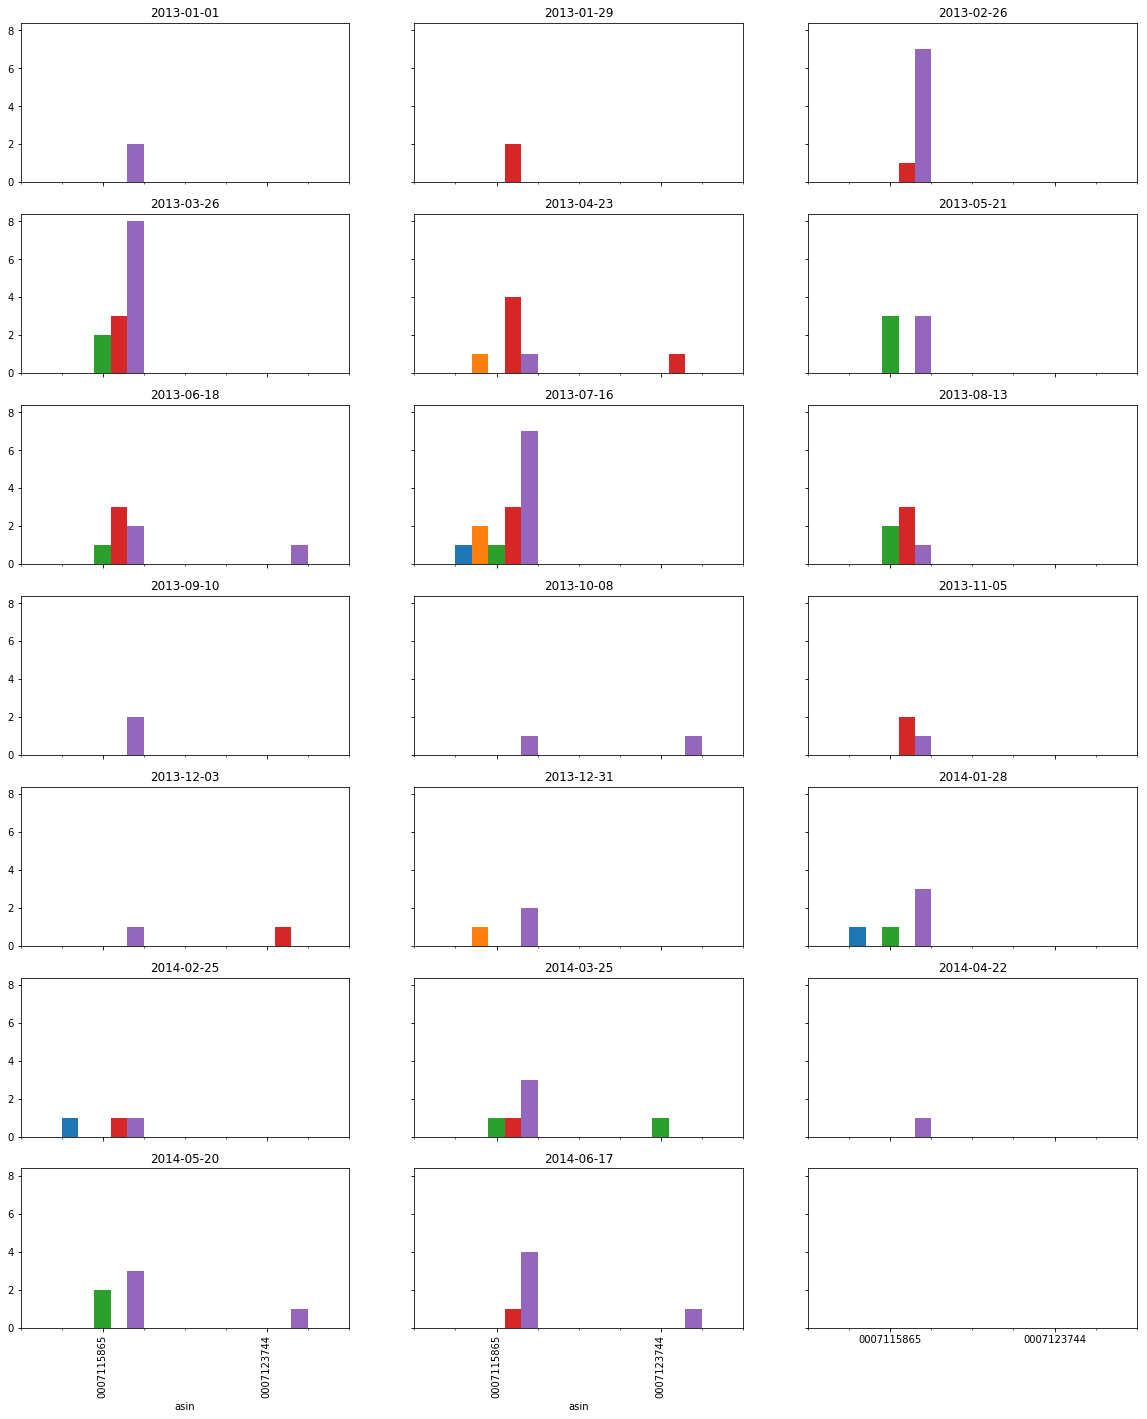

In [16]:
start = date(2013,1,1)
delta = timedelta(weeks=4)
dates = [start + (delta*x) for x in range(0, 36)]

fig, ax = plt.subplots(7, 3, 
    sharex=True, 
    sharey=True, 
    figsize=(20,24))

plotratings(asin=list(Ruby_asins['asin']))

## Python Programming Product Statistics
#### products.ratingsDistribution(), products.seasonalOrderDistribution(), products.statsByProduct()

In [17]:
seasonalorderdist = explorer.products.seasonalOrderDistribution(asin=list(Python_asins['asin']))
pd.DataFrame(seasonalorderdist.results, columns = seasonalorderdist.columns)

,asin,productid,spring_sales,summer_sales,fall_sales,winter_sales
0,0007107927,12177,5,1,103,177
1,0007111584,12219,1,2,0,0
2,0007115768,12251,0,1,2,0
3,0007123477,12329,1,2,0,1


In [18]:
ratingsdist = explorer.products.ratingsDistribution(asin=list(Python_asins['asin']))
pd.DataFrame(ratingsdist.results, columns = ratingsdist.columns)

,asin,productid,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes
0,0007107927,12177,25,17,23,81,225
1,0007111584,12219,0,0,0,0,11
2,0007123477,12329,0,0,0,1,3
3,0007115768,12251,0,1,0,0,0


In [19]:
statsbyprod = explorer.products.statsByProduct(asin=list(Python_asins['asin']))
pd.DataFrame(statsbyprod.results, columns = statsbyprod.columns)

,productid,asin,numorders,avgrating,category,days_on_sale
0,12219,0007111584,11,5.0000000000000000,285856,0.0
1,12329,0007123477,12,4.7500000000000000,285856,185.0
2,12251,0007115768,3,2.0000000000000000,285856,391.0
3,12177,0007107927,106106,4.2506738544474394,285856,363.0


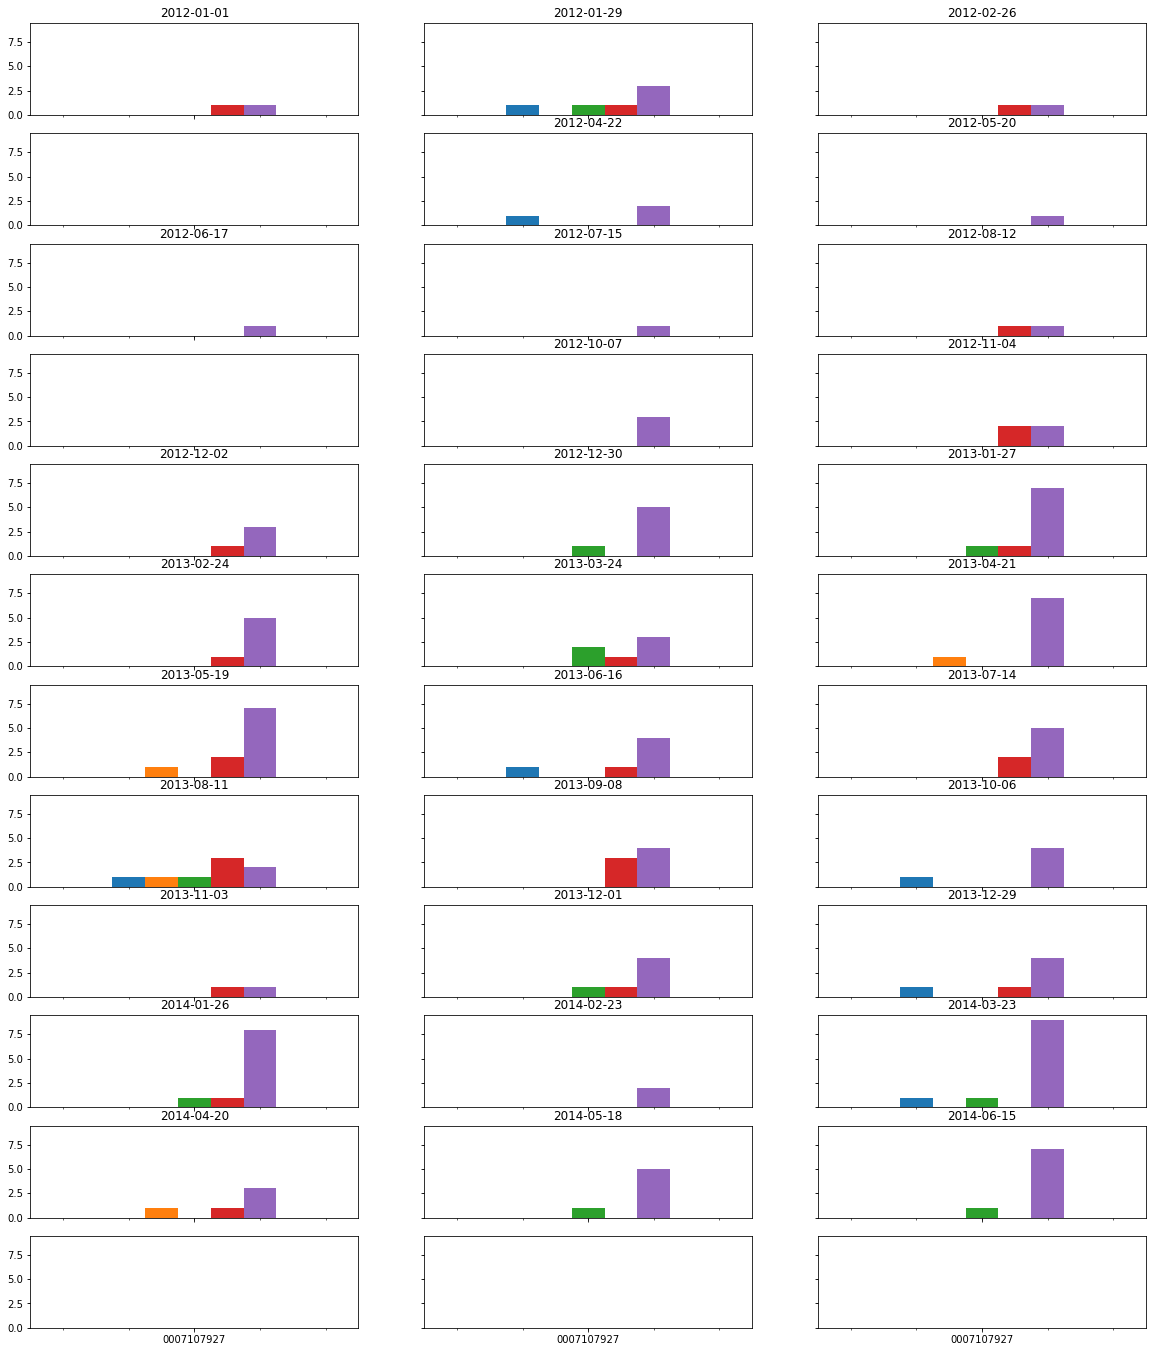

In [20]:
start = date(2012,1,1)
delta = timedelta(weeks=4)
dates = [start + (delta*x) for x in range(0, 36)]

fig, ax = plt.subplots(12, 3, 
    sharex=True, 
    sharey=True, 
    figsize=(20,24))

#plotratings(asin=['0007107927'])
plotratings(asin=list(Python_asins['asin']))

## Descendants (children + children of children + ...) 
#### categories.childrenOf(), categories.getNodes()

In [23]:
#count node_id 1 descendants

def countDescendants(node_id):
    descendants = []
    
    children_1 = []
    try:
        if explorer.categories.childrenOf(node_id=node_id).to_pandas()['level'][0] < 5:
            children_1 = list(explorer.categories.childrenOf(node_id=node_id).to_pandas()['child_node_id'])
    except:
        pass
        
    children_2 = []
    for i in range(len(children_1)):
        try: 
            if explorer.categories.childrenOf(node_id=children_1[i]).to_pandas()['level'][0] < 5:
                children_2 += list(explorer.categories.childrenOf(node_id=children_1[i]).to_pandas()['child_node_id'])
        except:
            pass
    
    children_3 = []
    for i in range(len(children_2)):
        try:
            if explorer.categories.childrenOf(node_id=children_2[i]).to_pandas()['level'][0] < 5:
                children_3 += list(explorer.categories.childrenOf(node_id = children_2[i]).to_pandas()['child_node_id'])
        except:
            pass

    children_4 = []
    for i in range(len(children_3)):
        try:
            if explorer.categories.childrenOf(node_id=children_3[i]).to_pandas()['level'][0] < 5:
                children_4 += list(explorer.categories.childrenOf(node_id = children_3[i]).to_pandas()['child_node_id'])
        except:
            pass    

    descendants = children_1 + children_2 + children_3 + children_4 
    return descendants

In [24]:
Descendants_1 = countDescendants(1)
print('Number of Descendents: '+str(len(Descendants_1)))

Number of Descendents: 303


In [25]:
descendant_counts = []
node_ids = list(explorer.categories.getNodes().to_pandas()['node_id'])

for node_id in node_ids:
    desccount = countDescendants(node_id)
    descendant_counts.append((node_id, len(desccount)))

In [26]:
descendant_counts_df = pd.DataFrame(descendant_counts, columns = ['node_id','descendant_count'])
descendant_counts_df

,node_id,descendant_count
0,1,303
1,173508,33
2,266162,3
3,720870,0
4,3564986011,0
5,882340,0
6,1007,0
7,1002,0
8,4539344011,0
9,266160,0


#### Node with largest number of descendants

In [27]:
max_descendants_count = descendant_counts_df[descendant_counts_df['descendant_count'] == descendant_counts_df['descendant_count'].max()]
max_descendants_count

,node_id,descendant_count
7470,27,621


In [29]:
max_descendants_cat =explorer.categories.nodesearch(node_id = int(max_descendants_count['node_id'])).to_pandas()
max_descendants_cat

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Travel,27,Books,Travel,N/A,N/A,N/A,N/A


## Benchmarking
#### benchmarks.statsByFunction()

In [30]:
explorer.benchmarks.statsByFunction(function_filter=[]).results

[('Customers.idsForCustomer', False, 241.2953794, 1206.476897, 5),
 ('Customers.clusterCustomers', False, 79.7915221935484, 2473.537188, 31),
 ('Categories.parentsOf', True, 63.841114, 63.841114, 1),
 ('Customers.statsByCustomer', False, 8.170416, 24.511248, 3),
 ('Products.priceDistribution', False, 3.38223020689655, 98.084676, 29),
 ('Products.statsByProduct', False, 3.28347164285714, 91.937206, 28),
 ('Products.seasonalOrderDistribution',
  False,
  1.35035780769231,
  35.109303,
  26),
 ('Products.clusterProducts', False, 1.2546134137931, 145.535156, 116),
 ('Categories.stringsearch', False, 1.055099, 1.055099, 1),
 ('Categories.search', False, 1.023032, 1.023032, 1),
 ('Reviews.termsByAsin', False, 0.977624, 0.977624, 1),
 ('Categories.nodesearch', False, 0.716854, 0.716854, 1),
 ('Categories.parentOf', True, 0.684463835820895, 45.859077, 67),
 ('Categories.parentOf', False, 0.541156, 2.70578, 5),
 ('Categories.childrenOf', False, 0.505070849673202, 154.55168, 306),
 ('Products.by